In [1]:
pip install nasdaq-data-link

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import datetime 

from statsmodels.tsa.seasonal import seasonal_decompose

import nasdaqdatalink

import warnings 
warnings.filterwarnings('ignore')

import seaborn as sns
sns.set()

In [3]:
start4 = datetime.date(2015,1,1)
end4 = datetime.date(2022,12,31)

ticker4 = 'OPEC/ORB'


In [4]:
df = nasdaqdatalink.get(dataset = ticker4 , start_date = start4,end_date = end4 )
print (f'downloaded {df.shape[0]} ROWS & {df.shape[1]} Columns of {ticker4}')

downloaded 2064 ROWS & 1 Columns of OPEC/ORB


In [5]:
df4 = df.copy()

In [6]:
df4.rename(columns={"Value":"price"},inplace = True)

In [7]:
oil_long_run_mean = np.round(df4['price'].mean(), 1)
print(oil_long_run_mean)

61.0


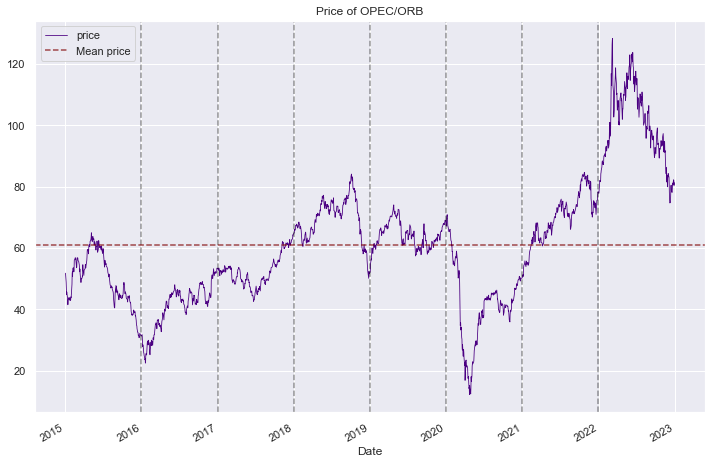

In [8]:
df4.plot(figsize=(12,8),color=('indigo'),linewidth=0.8);
plt.title(f"Price of {ticker4}")

for eachyear in range(start4.year , end4.year):
    plt.axvline(pd.to_datetime(str(eachyear)+'-12-31'), color='black', linestyle='--', alpha=0.4)
plt.axhline(df4['price'].mean(),label = 'Mean price',color = 'maroon',linestyle = '--',alpha = 0.7)
plt.legend()


In [9]:
window_length21 = 21
window_length252 = 252

df4['rolling_21d_mean'] = df4.price.rolling(window=window_length21).mean()
df4['rolling_21d_std'] = df4.price.rolling(window=window_length21).std()

df4['rolling_252d_mean'] = df4.price.rolling(window=window_length252).mean()
df4['rolling_252d_std'] = df4.price.rolling(window=window_length252).std()

In [10]:
df4.dropna()

,price,rolling_21d_mean,rolling_21d_std,rolling_252d_mean,rolling_252d_std
Date,,,,,
2015-12-21,30.74,35.948571,3.179441,50.004960,8.049791
2015-12-22,31.15,35.605714,3.293689,49.923095,8.136106
2015-12-23,31.25,35.208571,3.292061,49.853175,8.220467
2015-12-24,32.17,34.844762,3.178313,49.796032,8.293108
2015-12-28,31.71,34.466667,3.047687,49.744127,8.365184
...,...,...,...,...,...
2022-12-23,80.58,79.891905,2.984858,100.547976,12.092549
2022-12-27,82.23,79.817143,2.900548,100.557143,12.077716
2022-12-28,81.96,79.913810,2.938082,100.562341,12.069393


Text(0, 0.5, 'Price per barrel (in US$)')

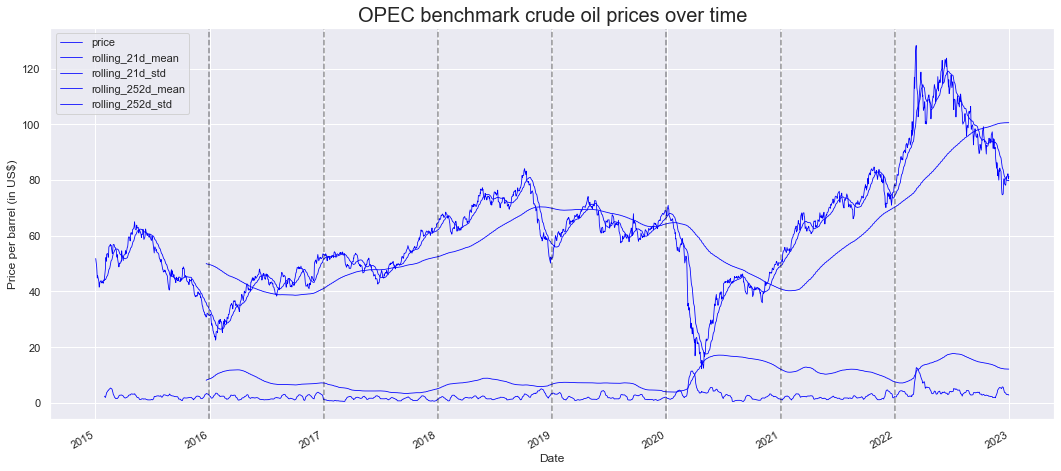

In [11]:
df4.plot(figsize = (18,8),linewidth = 0.8,color='blue')

for eachyear in range(start4.year,end4.year):
    plt.axvline(pd.to_datetime(str(eachyear)+'-12-31'), color='black', linestyle='--', alpha=0.4)
    
plt.title("OPEC benchmark crude oil prices over time", fontsize=20)
plt.xlabel("Date")
plt.ylabel("Price per barrel (in US$)")

In [12]:
df4x = df.copy()

In [13]:
df4x = df4x.resample("M").mean()

In [14]:
df4x.rename(columns={'Value': 'monthly_mean_price'}, inplace=True)

In [15]:
df4x['Year'] = df4x.index.year

In [16]:
df4x['month'] = df4x.index.month_name().str[:3]

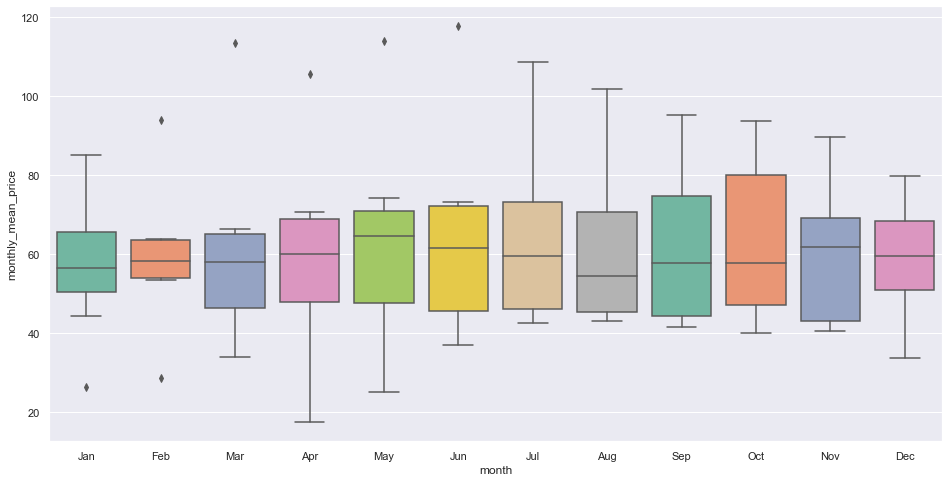

In [17]:
sns.set(rc={'figure.figsize':(16,8)})

df4xbox = sns.boxplot(x = 'month',y = 'monthly_mean_price',data = df4x,order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],palette = 'Set2')



In [18]:
decompose_series = seasonal_decompose(df4['price'],period = 252,model = 'multiplicative')

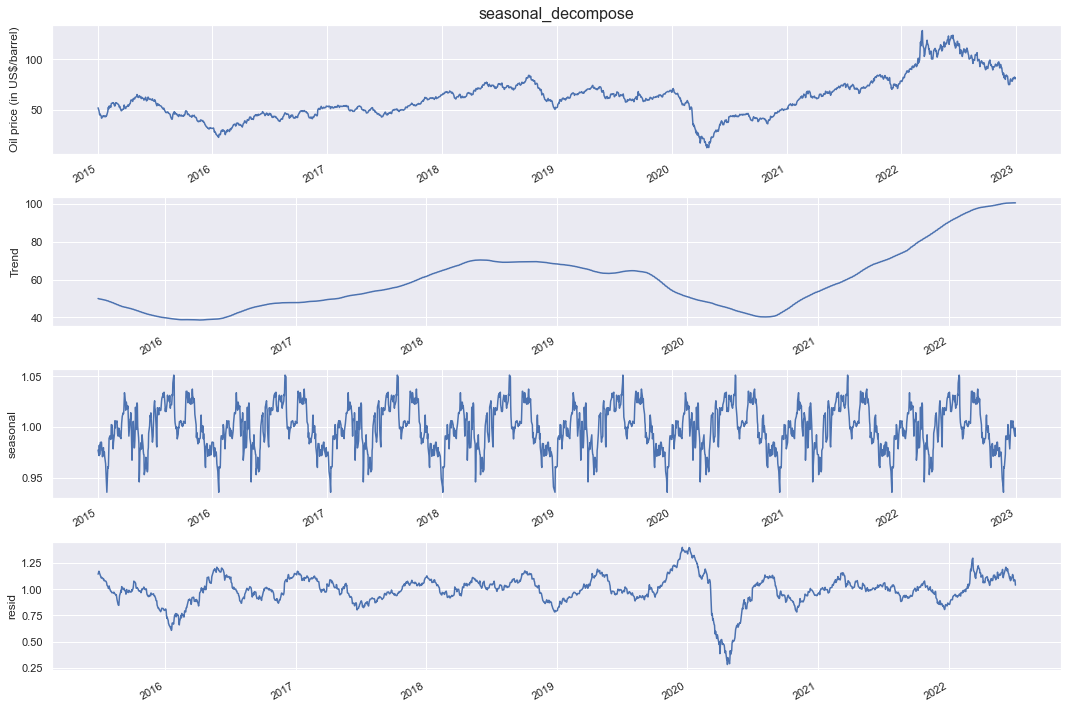

In [27]:
fig, ax = plt.subplots(4,1,figsize = (15,10))

decompose_series.observed.plot(ax=ax[0])
ax[0].set_title("seasonal_decompose",fontsize = 16)
ax[0].set(xlabel = "",ylabel = "Oil price (in US$/barrel)")

decompose_series.trend.plot(ax=ax[1])
ax[1].set(xlabel = "", ylabel = "Trend")

decompose_series.seasonal.plot(ax=ax[2])
ax[2].set(xlabel = "",ylabel = 'seasonal')

decompose_series.resid.plot(ax=ax[3])
ax[3].set(xlabel = "",ylabel='resid')

plt.tight_layout()

In [35]:
start4 = '1995-01-01'
end4 = '2021-09-29'
ticker4 = 'WGC/GOLD_DAILY_INR'

In [36]:
df = nasdaqdatalink.get(dataset = ticker4,start_date = start4,end_name = end4,)

In [37]:
df4=df.copy()

In [39]:
df4.rename(columns = {'Values':'Price'},inplace = True)

In [40]:
df4

,Value
Date,
1995-01-02,12022.09
1995-01-03,11948.83
1995-01-04,11781.62
1995-01-05,11771.27
1995-01-06,11769.08
...,...
2020-03-09,123911.33
2020-03-10,122666.66
2020-03-11,121778.01
